# Breast Cancer Prediction using Wisconsin Dataset

- Lead Developer and Lead: Md Mijanul Haque
- Team Member: Navid Bin Ahmed
- Start Date: 16-Jan 25 Thursday

- Link of Dataset: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

## 1. Importing Some Dependancies

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings poping up with exceutions
import warnings
warnings.filterwarnings('ignore')

## 2. Loading Dataset

In [115]:
df = pd.read_csv('breast_cancer_3.csv')

In [116]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [56]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [118]:
df.shape

(569, 32)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 3. EDA

EDA for cleaning and preparing data mainly focuses on the followings:

1. Handling missing values
2. Handling dupicate values
3. Handling cateogrical features - encoding
4. Handling numerical features

Execution of these steps may not match going forward.

Let's begin the initial exploration, anyway!

In [120]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

- It is observed from the column 'mean' that, we would require standardization. It's because each mean value varies to each other. 

- Describe method also depicts the percentiles and standard deviation

Let's see how we can utilize these parameters going forward

In [121]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

From the dataset, we observed that our output feature would be 'diagnosis'. 

- Which contains two classes - M and B (Malignant and Benign)
- Output feature with these two classes simply determines that our apporach could be a binary classification problem.
- Based on the independent features, the result would be either Malignant (1) or Benign (0). Expressed with 1 and 0.

In [122]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

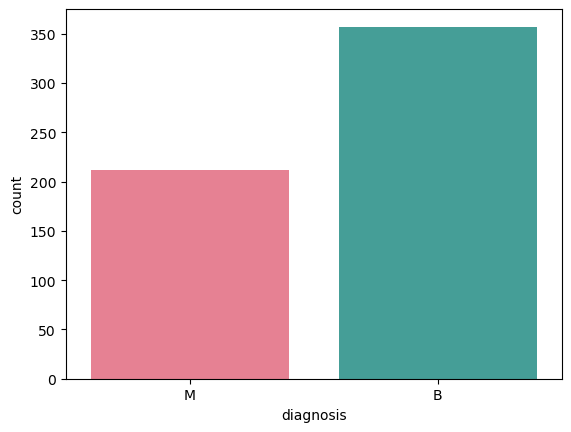

In [123]:
sns.countplot(df['diagnosis'], palette='husl')

A simple graphical representation of how the diagnosis output looks like.

Note: 
These data are categorical, not numerical

## 3.1 Cleaning and Preparing Data

In [124]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

We probably don't need the 'id' columns at the left most side. Rest looks fine.

However, a domain expert or a physician would be able to comment on which features are more relevant as for the detection.

As an alternative, here we would simply follow the conventional techniques to select the significant features and proceed.

In [125]:
df.drop('id', axis=1, inplace=True)

In [126]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

- Unnecessary of insignificant 'id' column / feature is gone. Now the features we are having are workable.

- We have to label encode the 'diagnosis' feature, so that the model can work with numerical data points

## 3.2 Handling Categorical Data- Label Encoding (Feature Engineering)

In [127]:
## Label encoding
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [128]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

## 3.3 Handling Null or Missing Values

In [129]:
## Checking missing or null values
## One of four vital steps of EDA

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Excellent! Finding a dataset with no missing value is a gem.

Let's proceed.

## 3.4 Handling Duplicate Values - if any

In [130]:
# Check for duplicated observations
df.duplicated().sum()

0

## 3.5 Feature Selection : Correlation

In [131]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

- This shows which specific features are correlated with other features and how strongly or weakly they are correlated.

- Features can be either positively correlated or negatively correlated

As examples,
- 'radius' and 'diagnosis' are highly correlated- 73%, positive correlation, the same for 'perimeter_mean' and 'radius_mean'


- radius_mean, perimeter_mean, and area_mean have a very high correlation with respect to positive detection.

These observations allow us to decide which features to keep and which to ignore going forward.

Let's see the output feature on diagram and then the correlation diagram.

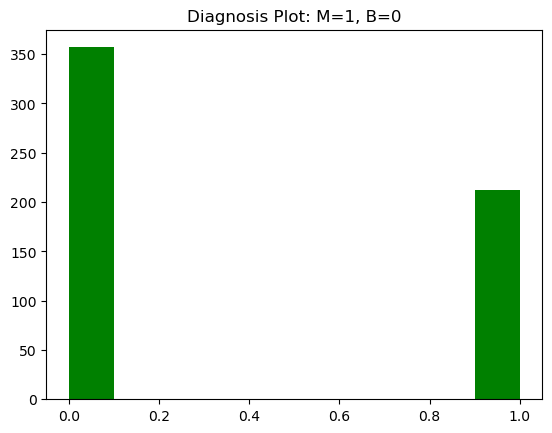

In [132]:
plt.hist(df['diagnosis'], color='g')
plt.title("Diagnosis Plot: M=1, B=0")
plt.show()

<AxesSubplot:>

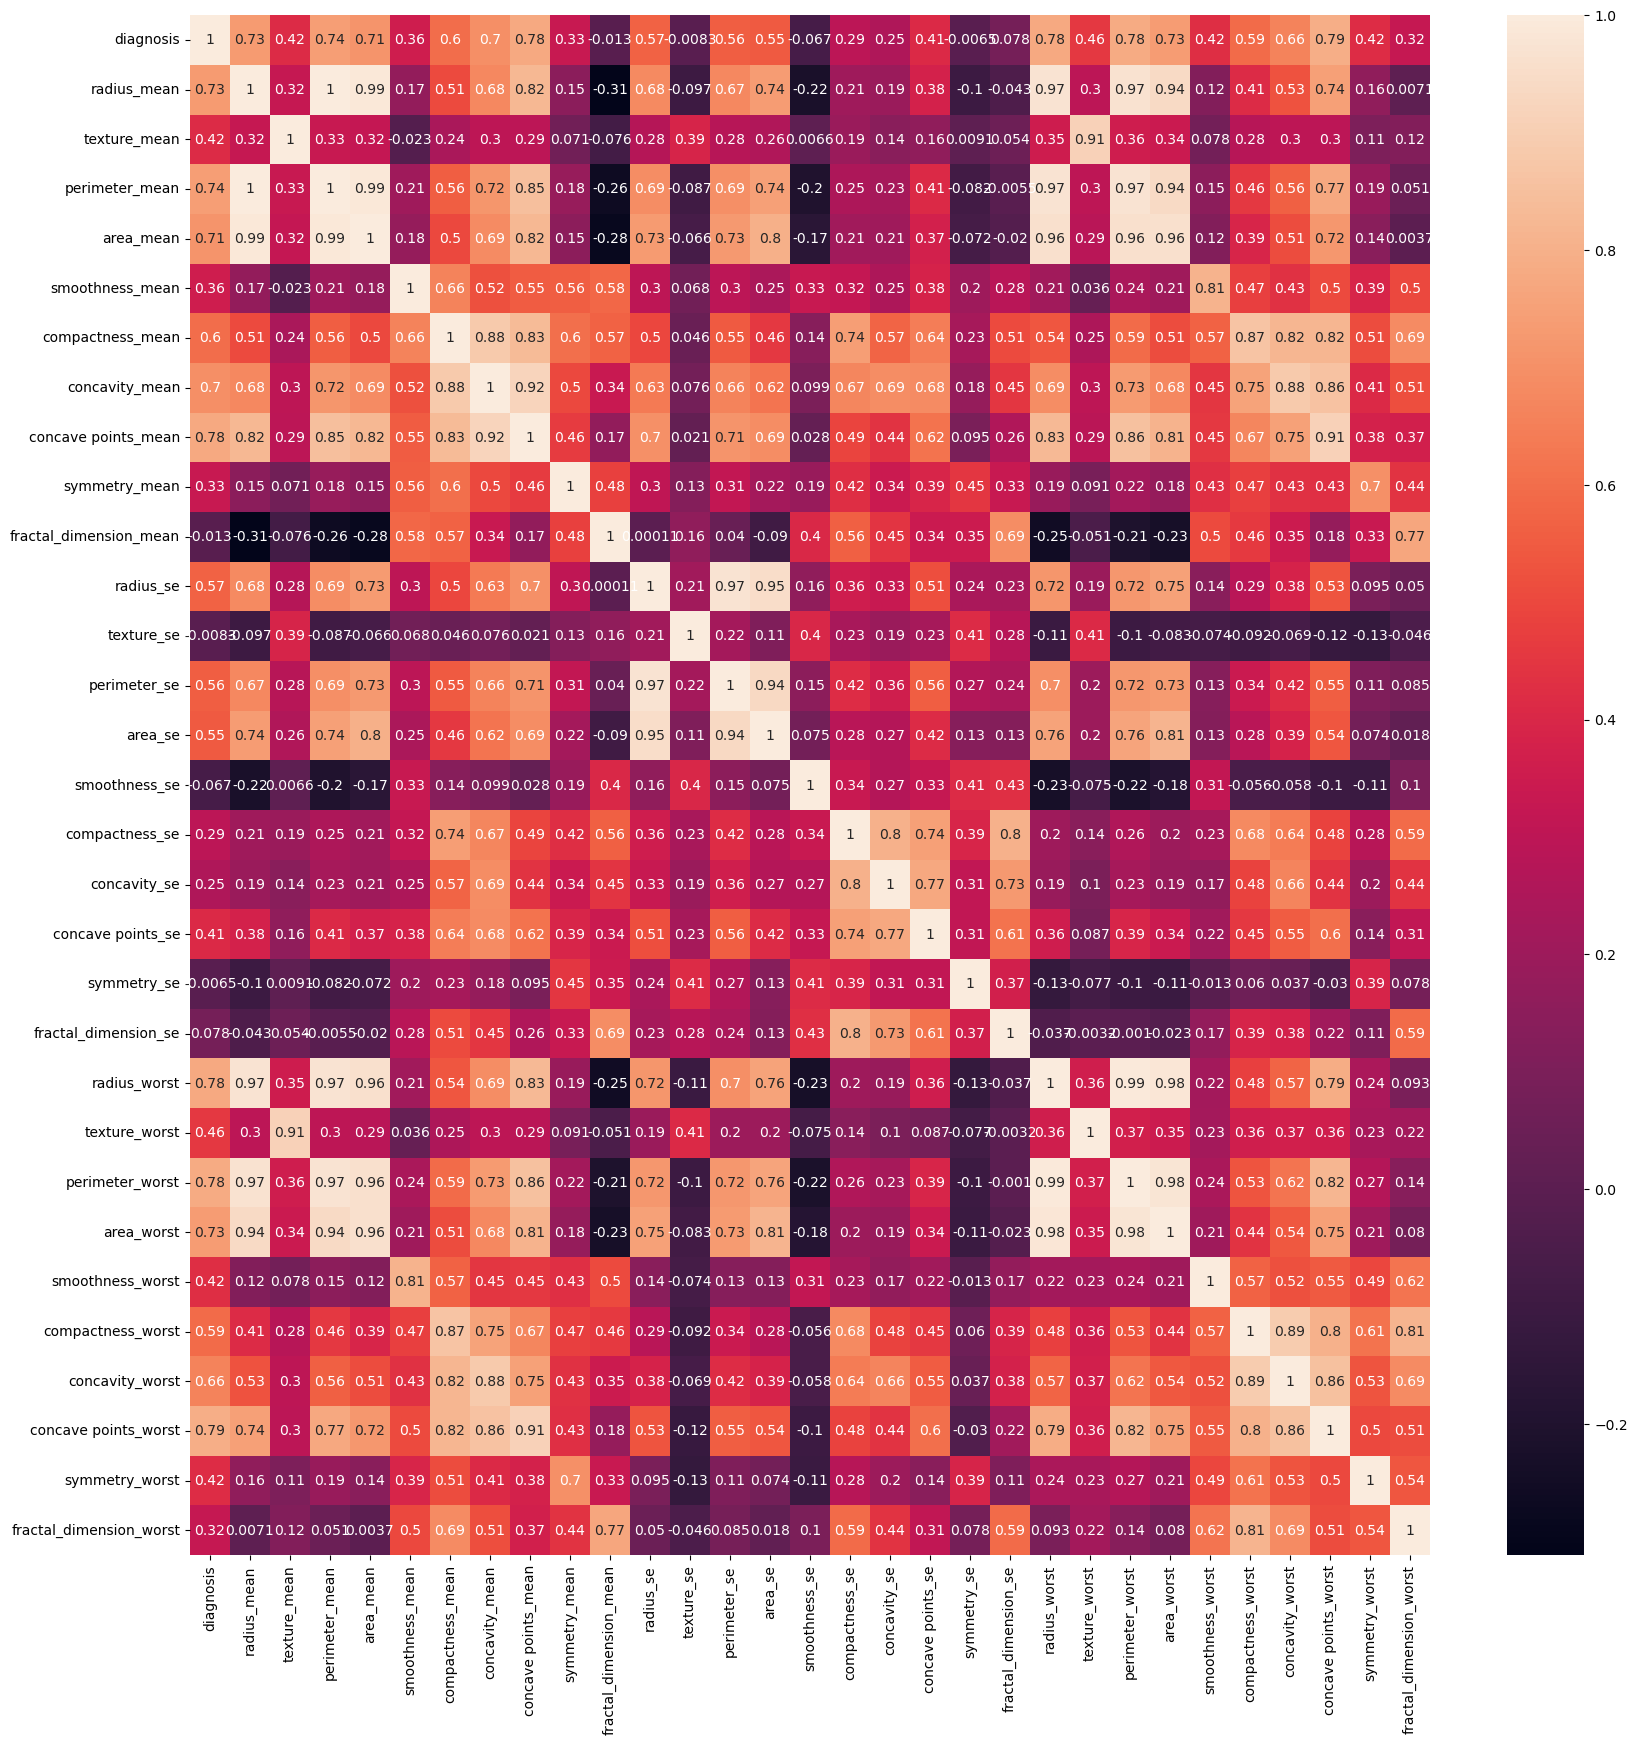

In [133]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

## heatmap contains the corr() method found in the earlier cell
## annot set 'True' allows to show the numerical data in the map

It is observed, radius_mean and diagnosis is positively related. The same for perimeter_mean.

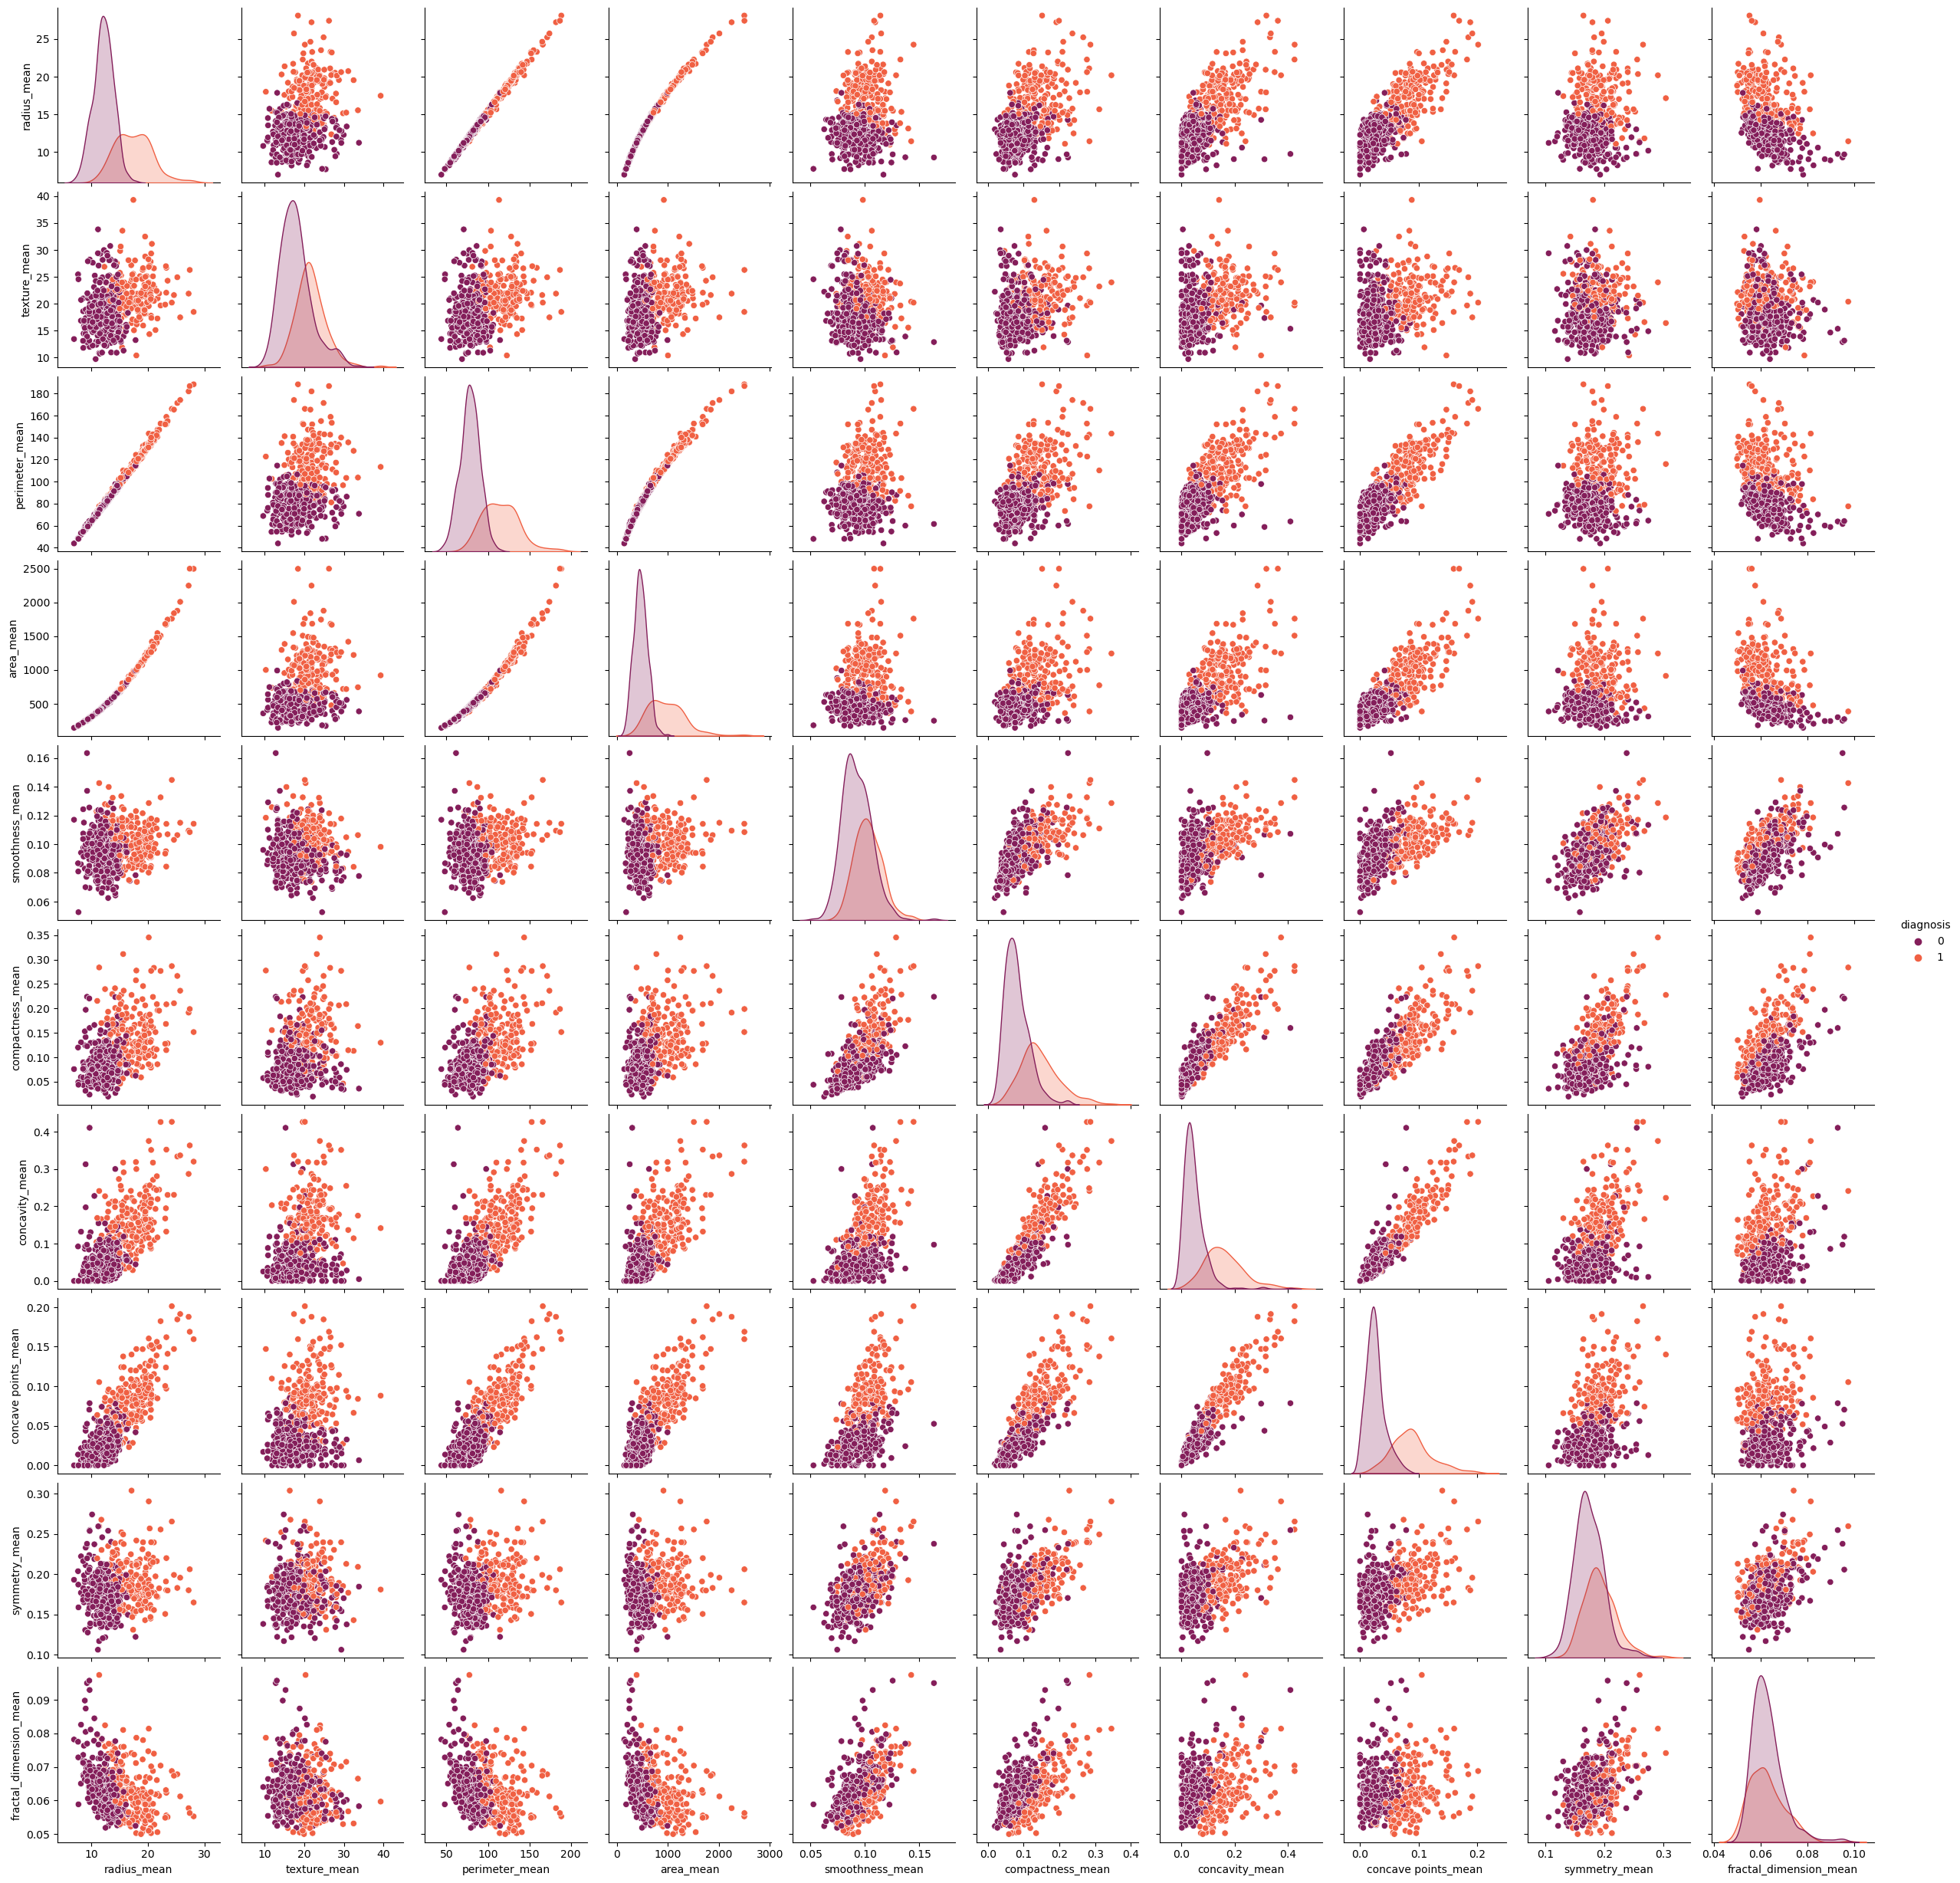

In [134]:
## A scatter plot matrix with the "mean" column
columns= ['diagnosis',
          'radius_mean',
          'texture_mean',
          'perimeter_mean',
          'area_mean',
          'smoothness_mean',
          'compactness_mean',
          'concavity_mean',
          'concave points_mean',
          'symmetry_mean',
          'fractal_dimension_mean']

sns.pairplot(data=df[columns], hue='diagnosis', palette='rocket')

We can observe the same here that, 

- Some features are linear

- For example, area_mean and perimieter_mean are linear and were also highly correlated in our previous finding

Therefore, to sum up, we can note,
- There is high linear patterns between the radius, perimeter, and area attributes which hints the presence of multi-collinearity between these features.
- Concavity, concave_points, compactness also show the same.


Challenges:
- There is multi-collinearity, which is a problem.
- To resolve this problem, we will pick one feature out of all features that show the linearity.

Let's see how we can achieve this goal. 

To check if this hypothesis is correct, let's first proceed with correlation matrix.

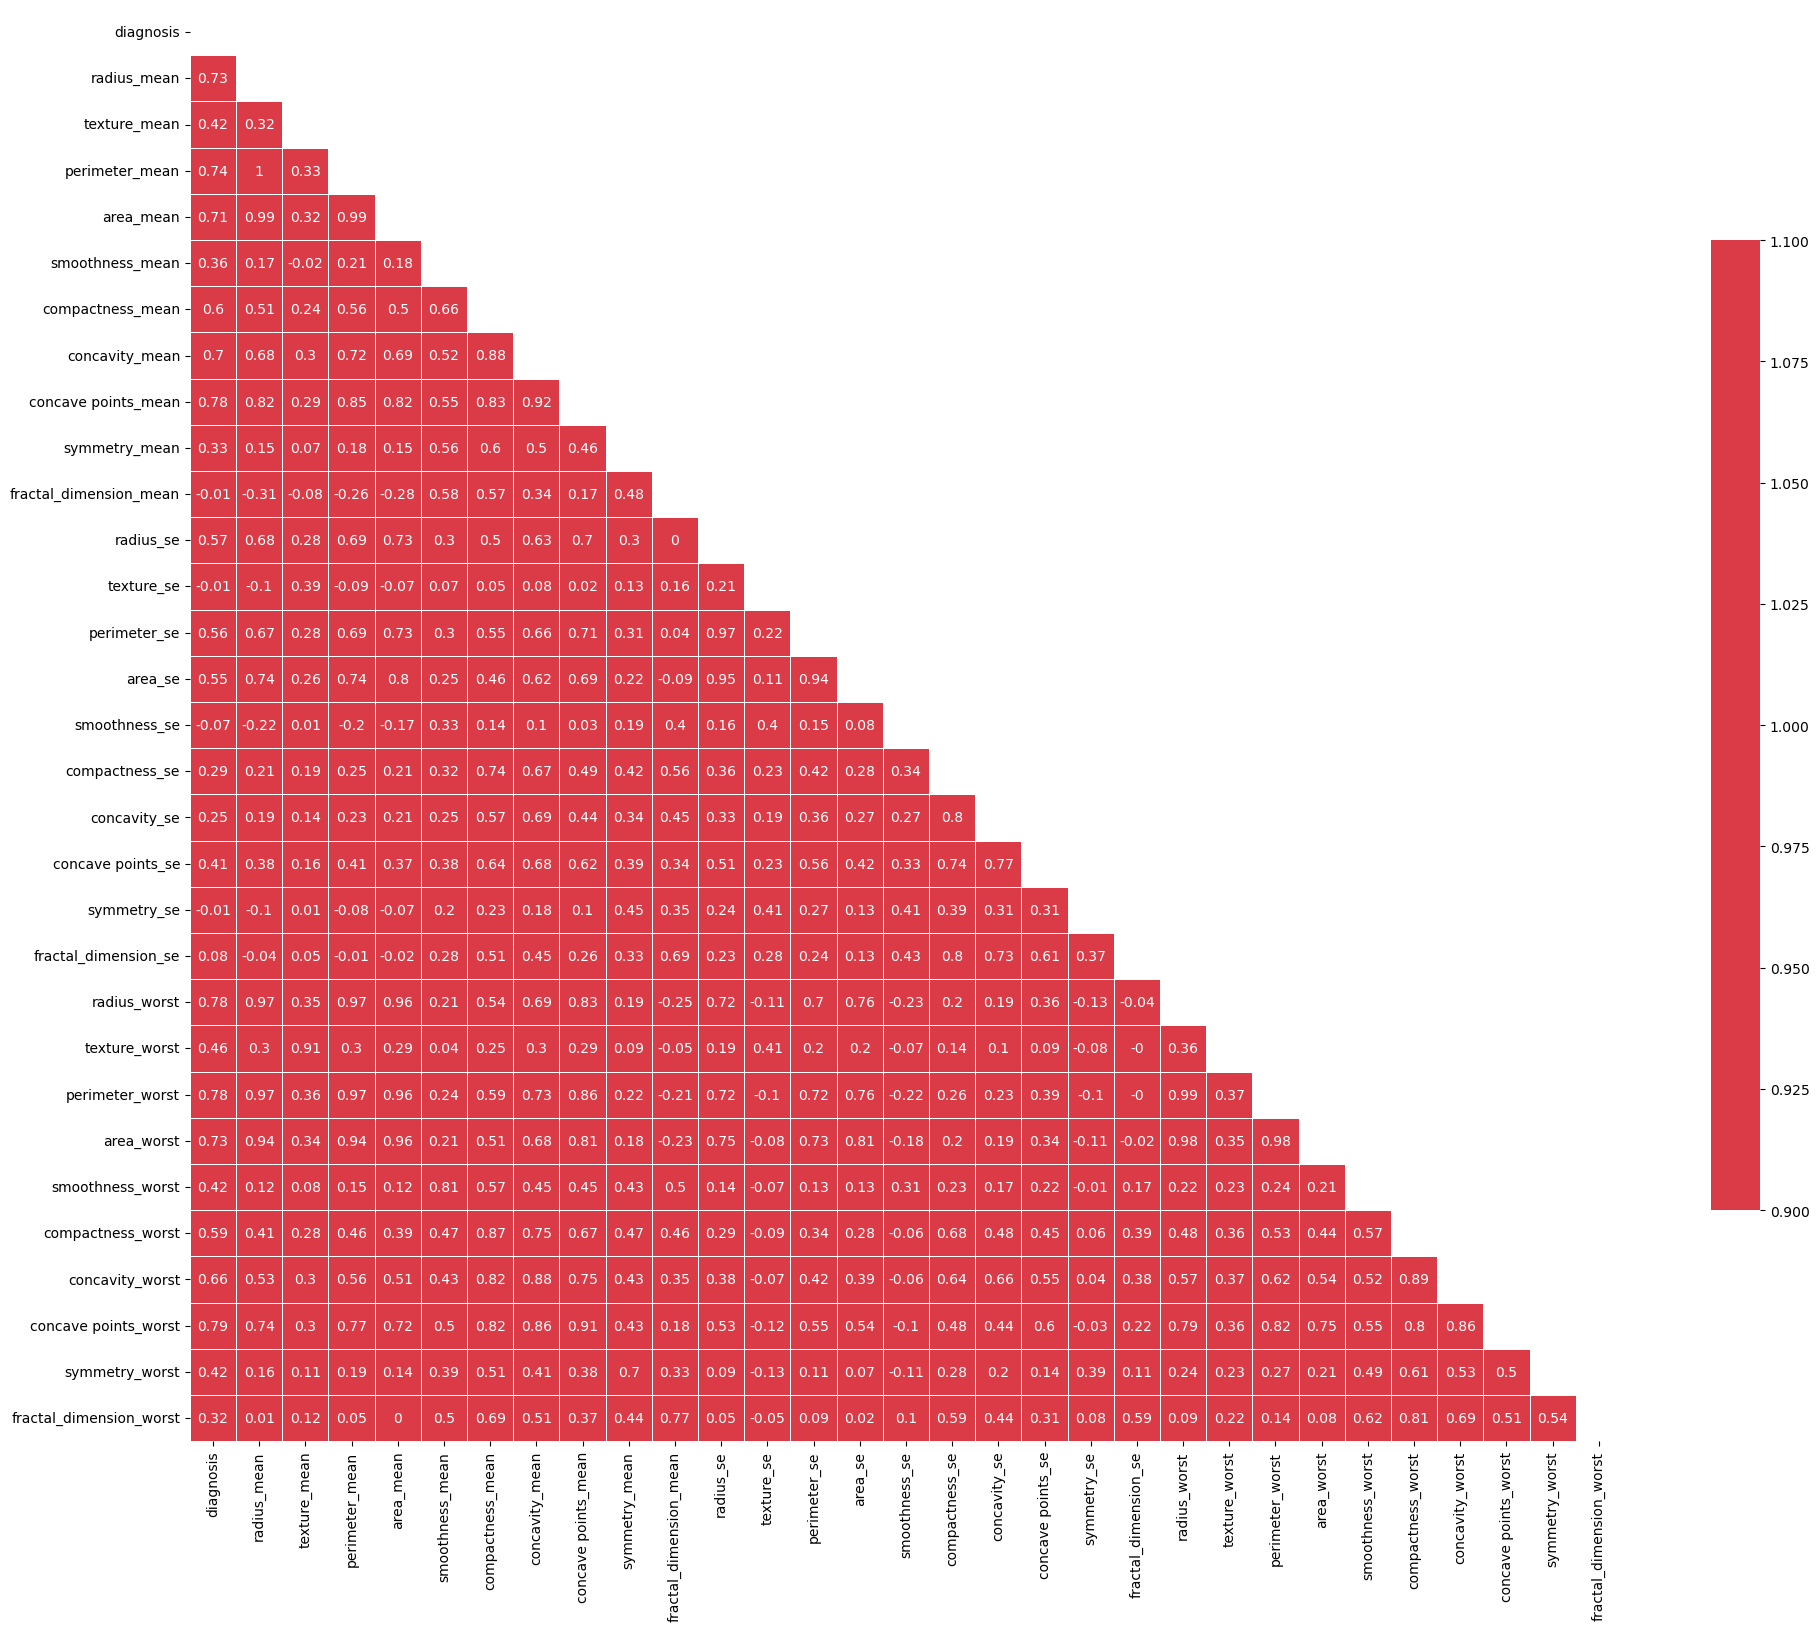

In [135]:
## Generate and visualize the correlation matrix

corr = df.corr().round(2)

## Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

## Define custom colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

## Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=1, vmax=1, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)

plt.tight_layout()

- We can observe and verify the presence of multi-collinearity as mentioned above (the numerical value in the sqaure boxes).

For example,
- The 'radius_mean' has a correlation of 1 and 0.99 with 'perimeter_mean' and 'area_mean' features respectively.
- Features for mean and worst contain the multi-collinearity. 'radius_mean' and 'radius_worst' sahre a correlation of 0.97 or 97%.
- There us multi-collinearity between attributes compactness, concavity, and concave points.


These multi columns essentially contain the same information for our model, which is the physical size of the observation (the cell).

Hence, we have to pick only one of the three features for further analysis.

Methods:
- Using Partial Least Squares Regression (PLS) or Principal Components Analysis (PCA) that reduce the number of features

- Using Regression Methods that cut the number of features to a smaller set of uncorrelated components

In [136]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [137]:
df.shape

(569, 31)

Before proceeding, this makes sure that the data looks fine as of now.

Let's drop the features as decided.

In [138]:
print("Columns in the dataFrane before dropping: ")
print(df.columns)

## Drop all 'worst' columns
column_worst = ['radius_worst',
                'texture_worst',
                'perimeter_worst',
                'area_worst',
                'smoothness_worst',
                'compactness_worst',
                'concavity_worst',
                'concave points_worst',
                'symmetry_worst',
                'fractal_dimension_worst']

df = df.drop(column_worst, axis=1, errors='ignore')

## Drop all columns related to the 'perimeter' and 'area' attributes
cols_perimeter_area = ['perimeter_mean',
                       'perimeter_se',
                       'area_mean',
                       'area_se']
df = df.drop(cols_perimeter_area, axis=1, errors='ignore')

## Drop all columns related to the 'concavity' and 'concave points' attributes
cols_concavity = ['concavity_mean',
                  'concavity_se',
                  'concave points_mean',
                  'concave points_se']
df = df.drop(cols_concavity, axis=1, errors='ignore')

## Verify remaining columns
print("Columns after dropping:")
print(df.columns)

Columns in the dataFrane before dropping: 
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Columns after dropping:
Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


This came up couple of trial and errors (KeyError]. Pushed me to do some extra work and invest time. 

- Error Message:
KeyError: "['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] not found in axis"

Using the following parameters, I took care of the error:

- df = df.drop(cols_perimeter_area, axis=1, errors='ignore')


In [141]:
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


In [142]:
df.shape

(569, 13)

Here it is, this is it!

These are our our features. 

Again note, it is Physicians and domain experts who can professionally comment on that.

Before going forward, let's have a look at the final features.

In [112]:
df.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          1        17.99         10.38          0.11840           0.27760   
1          1        20.57         17.77          0.08474           0.07864   
2          1        19.69         21.25          0.10960           0.15990   
3          1        11.42         20.38          0.14250           0.28390   
4          1        20.29         14.34          0.10030           0.13280   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0         0.2419                 0.07871     1.0950      0.9053   
1         0.1812                 0.05667     0.5435      0.7339   
2         0.2069                 0.05999     0.7456      0.7869   
3         0.2597                 0.09744     0.4956      1.1560   
4         0.1809                 0.05883     0.7572      0.7813   

   smoothness_se  compactness_se  symmetry_se  fractal_dimension_se  
0       0.006399         0.04904      0.03003              0.006193  
1       0.005225         0.01308      0.01389              0.003532  
2       0.006150         0.04006      0.02250              0.004571  
3       0.009110         0.07458      0.05963              0.009208  
4       0.011490         0.02461      0.01756              0.005115

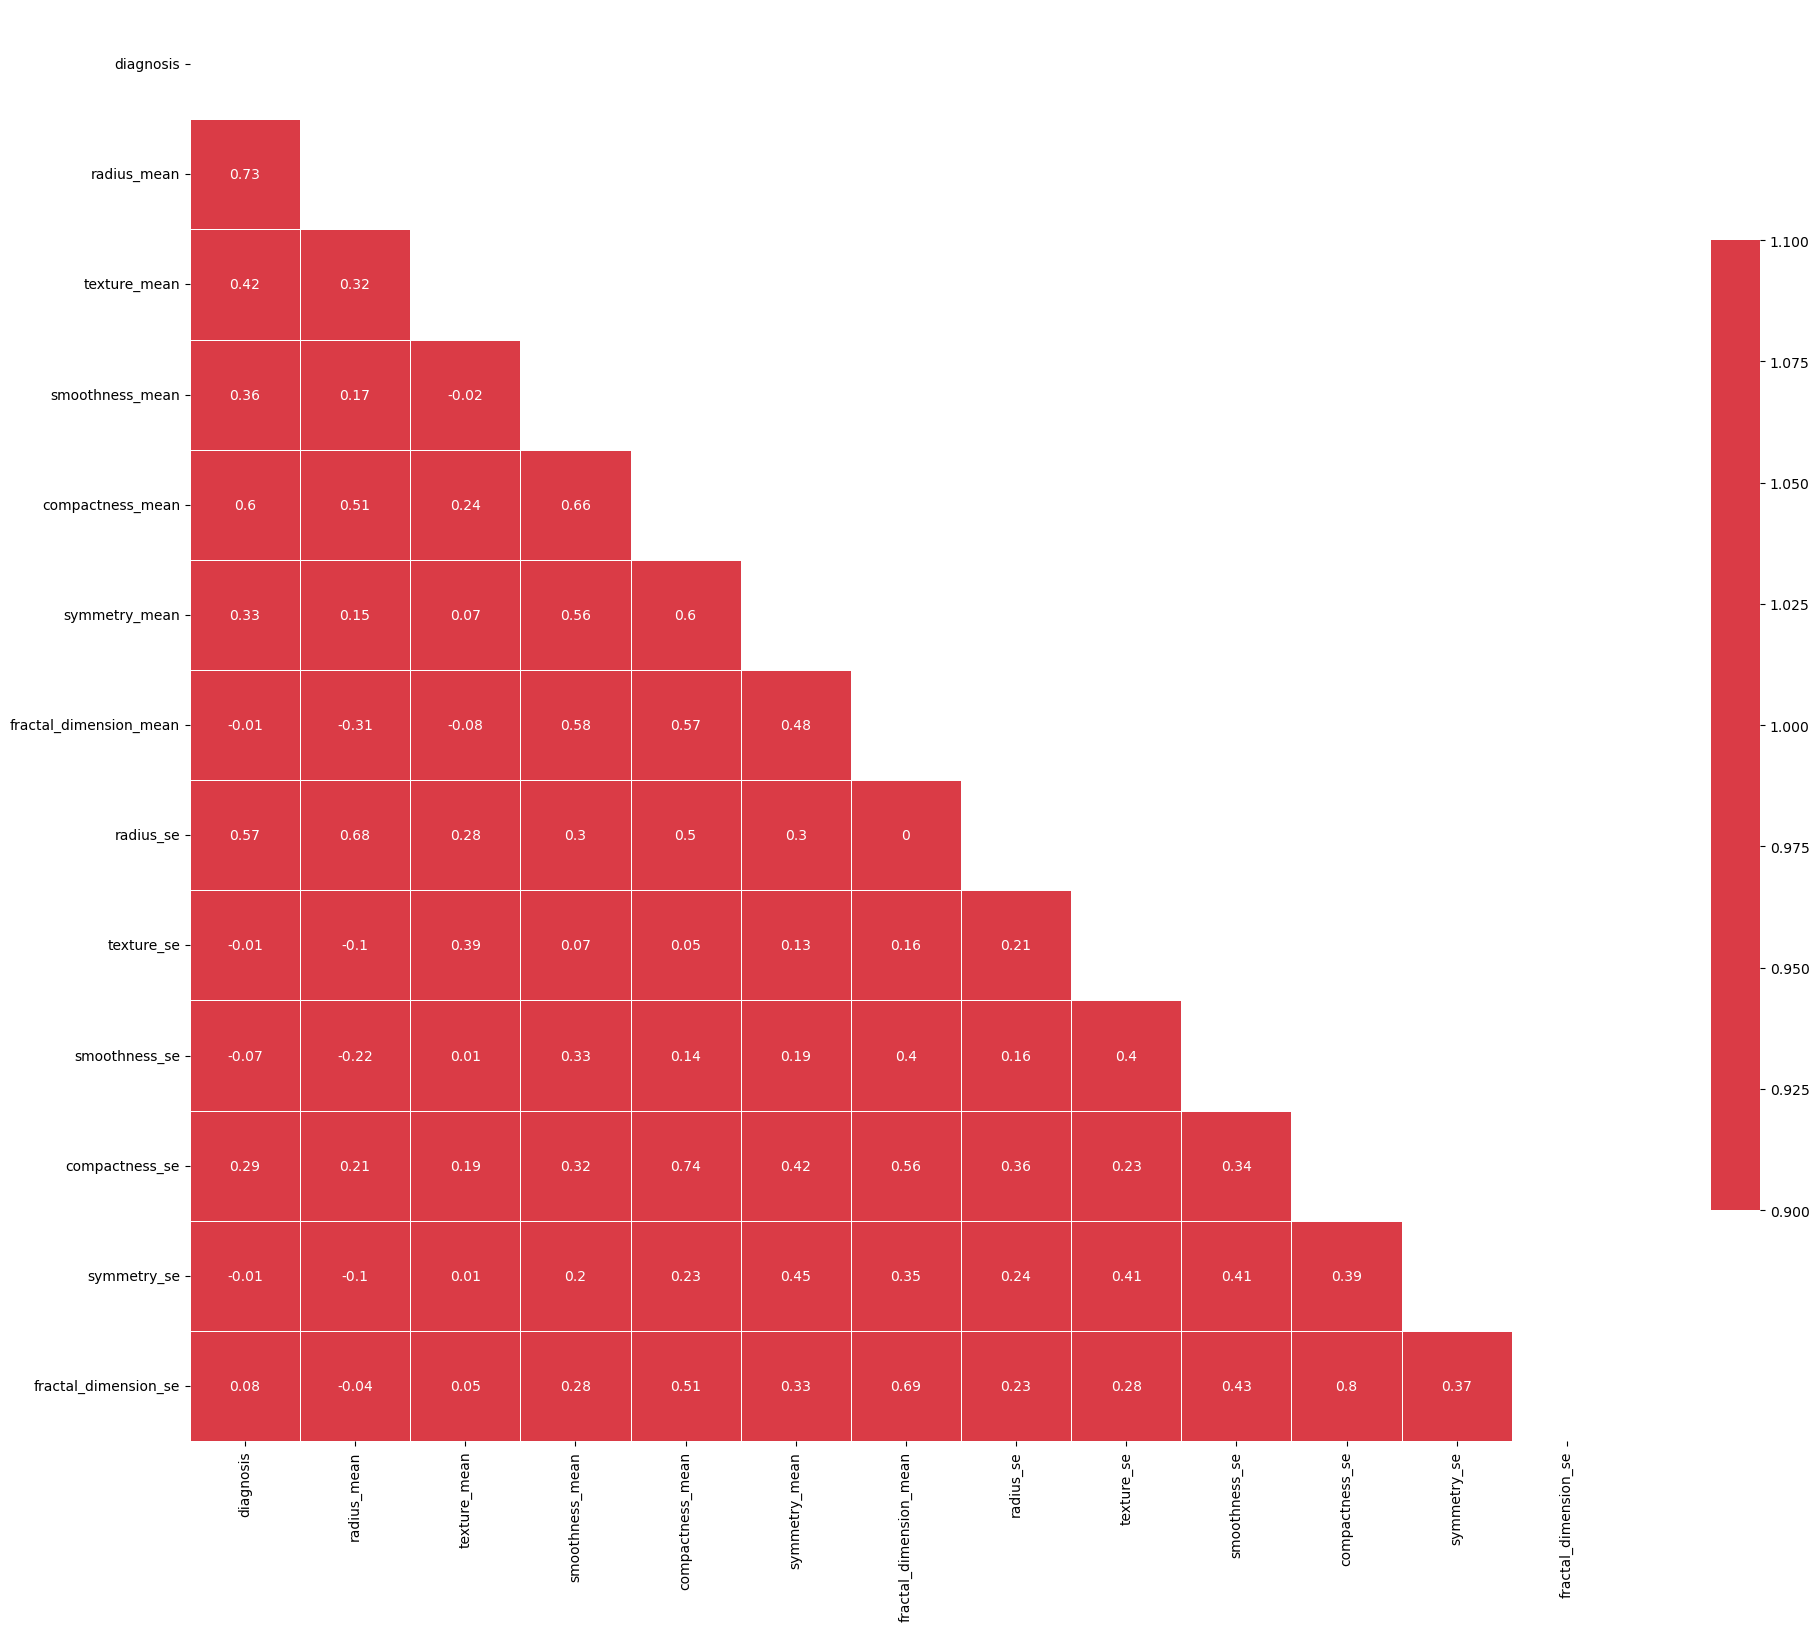

In [144]:
## Heatmap again to verify that the high correlation problem is solved

corr = df.corr().round(2)

## Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20,20))

## Define custom colormap
## cmap = sns.diverging_palette(220,10, as_cmap=True)

## Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=1, vmax=1, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5}, annot=True)

plt.tight_layout()

There is hardly any high correlation multi-collinearity being eliminated.

## 4. Building Model

In [145]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [146]:
from sklearn.model_selection import train_test_split # Data partition

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [150]:
df.shape

(569, 13)

Testing size is 30%, so we will train the model with 70% of data. 

Which is 70% of 569 rows or 399 or approximately 400. Rest will be used for testing purpose.

## 4.1 Feature Scaling

Data for different features are converted under the same scale, i.e., same maginitude.

This standardization centers the data around zero with a standard deviation of one. 

This is important for machine learning algorithms because it ensures that each feature contributes equally to the result.

In [152]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [153]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## 4.2 Testing Various Models - Phase 1

Let's observe the performance of various models to select the good one (as compared to other)

### a. Logistic Regression

In [155]:
#from xgboost import XGBClassifier 
#from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression

In [158]:
lr = LogisticRegression()

model_1 = lr.fit(X_train, y_train)
prediction_1 = model_1.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, prediction_1)
cm_1

array([[110,   5],
       [  2,  54]], dtype=int64)

<AxesSubplot:>

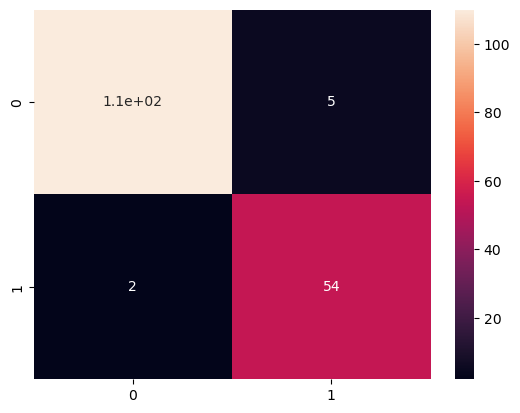

In [172]:
sns.heatmap(cm_1, annot=True)

## to save
# plt.save('cm.png')

- TP---FP 
- FN---TN

 5 cases are incorrectly identified as 'Positive'
 
 2 cases are incorrectly identified as 'Negative'

In [173]:
TP = cm_1[0][0]
TN = cm_1[1][1]
FN = cm_1[1][0]
FP = cm_1[0][1]
print('Testing Accuracy: ', (TP+TN)/(TP+TN+FN+FP))

Testing Accuracy:  0.9590643274853801


In [174]:
## Let's check if this accuracy matches 
## with the accuracy found using a method

from sklearn.metrics import accuracy_score

In [179]:
acc_1 = accuracy_score(y_test, prediction_1)
print(f"Testing Accuracy_validate: {acc_1}")

Testing Accuracy_validate: 0.9590643274853801


The conclusion is that, the Logistic Regression mbdel is ~96% accurate.

### b. Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

model_2 = dtc.fit(X_train, y_train)
prediction_2 = model_2.predict(X_test)

In [176]:
cm_2 = confusion_matrix(y_test, prediction_2)
cm_2

array([[106,   9],
       [  8,  48]], dtype=int64)

In [177]:
TP = cm_2[0][0]
TN = cm_2[1][1]
FN = cm_2[1][0]
FP = cm_2[0][1]
print('Testing Accuracy: ', (TP+TN)/(TP+TN+FN+FP))

Testing Accuracy:  0.9005847953216374


In [181]:
acc_2 = accuracy_score(y_test, prediction_2)
print(f"Testing Accuracy_validate: {acc_2}")

Testing Accuracy_validate: 0.9005847953216374


Decision Tree = ~ 90%

Not as accurate as Logistic Regression.

Logistic Regression = ~ 96%

### c. Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model_3 = rfc.fit(X_train, y_train)
prediction_3 = model_3.predict(X_test)

In [184]:
cm_3 = confusion_matrix(y_test, prediction_3)
cm_3

array([[108,   7],
       [  7,  49]], dtype=int64)

In [185]:
TP = cm_3[0][0]
TN = cm_3[1][1]
FN = cm_3[1][0]
FP = cm_3[0][1]
print('Testing Accuracy: ', (TP+TN)/(TP+TN+FN+FP))

Testing Accuracy:  0.9181286549707602


In [186]:
acc_3 = accuracy_score(y_test, prediction_3)
print(f"Testing accuracy_validate: {acc_3}")

Testing accuracy_validate: 0.9181286549707602


- Random Forest = ~ 92% ......(model_3)
- Decision Tree = ~ 90% ......(model_2)
- Logistic Regression = ~ 96% ......(model_1)

Better than Decision Tree, but not as accurate as Logistic Regression.

### 4.2.1 Performance Matrix: Classification Reports

- Logistic Regression
- Decision Tree
- Random Forest

In [188]:
## Logistic Regression
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       115
           1       0.92      0.96      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [189]:
## Decision Tree
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       115
           1       0.84      0.86      0.85        56

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [191]:
## Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       115
           1       0.88      0.88      0.88        56

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



Recall = TP/(TP+FN)


## 4.3 Testing Models - Phase 2 (KNN, SVM, NB)

Let's test a few other models.

### d. K-Nearest Neighbor (KNN)

### e. Support Vector Machine

### f. Naive Bayes

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [193]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))

In [195]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [201]:
## Evaluate each model

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=40, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    
    msg = '%s: %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.901987, (0.044061)
SVM: 0.909615, (0.045167)
NB: 0.899744, (0.064079)


SVM performs the best among these three.

Which is ~ 91% with an SD of ~ 4% 

### 4.3.1 Performance Matrix: Classification Report for SVM

In [220]:
SVM = SVC()

model_4 = SVM.fit(X_train, y_train)
prediction_4 = model_4.predict(X_test)

acc_4 = accuracy_score(y_test, prediction_4)
print(f"Accuracy score: {acc_4}")

print("Classification report:")
print(classification_report(y_test, prediction_4))

cm_4 = confusion_matrix(y_test, prediction_4) 
print("Confusion matrix:")
cm_4

Accuracy score: 0.9649122807017544
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        56

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion matrix:


array([[112,   3],
       [  3,  53]], dtype=int64)

- Support Vector Machine = ~ 97 % ......(model_4)
- Random Forest = ~ 92% ......(model_3)
- Decision Tree = ~ 90% ......(model_2)
- Logistic Regression = ~ 96% ......(model_1)

and,
- KNN = ~ 90% ......(model_5)
- Naive Bayes = ~ 90% ......(model_6)

Additionally, from classification report,
Support Vecor Machine gets 112 True-Positive, while Logistic Regression had 110.

- TP = 112 : cases correctly identified
- TN = 53 : cases correctly rejected
- FN = 3 : cases incorrectly rejected
- FP = 3 : cases incorrectly identified

### Decision:
### SVM is better than all other models with almost 97% accuracy.

## 5. Saving and Deployment

In [224]:
import joblib
joblib.dump(model_4, 'svm_model_bc_detection.pkl')
print("Model saved successfully")

Model saved successfully


In [227]:
## Leading the model
loaded_model = joblib.load('svm_model_bc_detection.pkl', mmap_mode=None)
print("Model loaded successfully!")

Model loaded successfully!


In [232]:
## Verify the loaded model by making a prediction
loaded_predictions = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_predictions)
print(f"Accuracy of our final Machine Learning model: {loaded_accuracy: .4f}")

Accuracy of our final Machine Learning model:  0.9649


### 5.1 Deployment

on Render